In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal

In [73]:
x = np.fromfile('symbols_les9.f32', dtype = 'float32')

In [74]:
x = x[2000:]

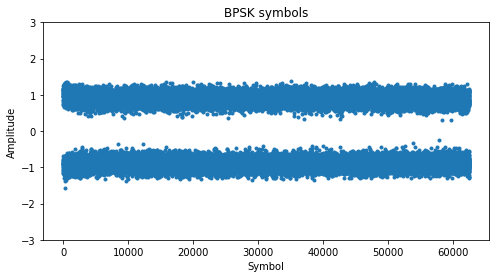

In [75]:
plt.figure(figsize = (8,4), facecolor = 'w')
plt.plot(x, '.')
plt.ylim((-3,3))
plt.title('BPSK symbols')
plt.xlabel('Symbol')
plt.ylabel('Amplitude');

In [76]:
x_diff = x[1:]*x[:-1]
corr = scipy.signal.correlate(x_diff, x_diff, mode = 'full')/np.sum(np.abs(x_diff))

In [77]:
def plot_corr(corr, sel, lags, threshold):
    plt.figure(figsize = (10,6), facecolor = 'w')
    plt.plot(lags, corr[sel], '.-')
    peaks = np.where(corr[sel] > threshold)[0]
    plt.plot(lags[peaks], corr[sel][peaks], '.', color = 'red')
    for peak in peaks:
        loc = lags[peak]
        plt.text(loc, corr[sel][peak], str(loc))
    plt.title('Bitstream autocorrelation')
    plt.ylabel('Autocorrelation (normalized)')
    plt.xlabel('Lag (bits)')

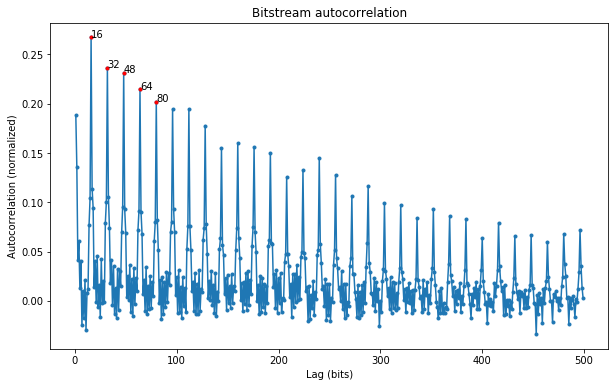

In [78]:
sel = slice(corr.size//2+1,corr.size//2+500)
lags = np.arange(1, 500)
plot_corr(corr, sel, lags, 0.2)

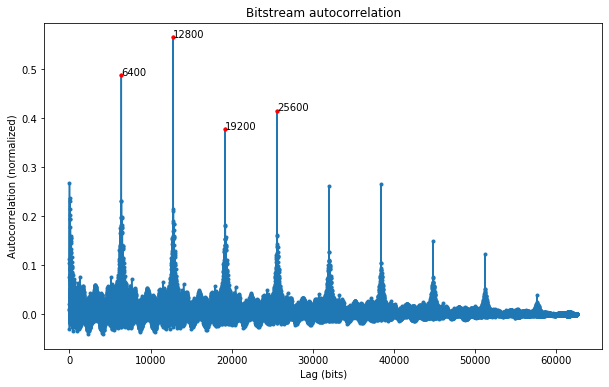

In [79]:
lags = np.arange(10, corr.size-(corr.size//2))
sel = slice(corr.size//2+10, None)
plot_corr(corr, sel, lags, 0.3)

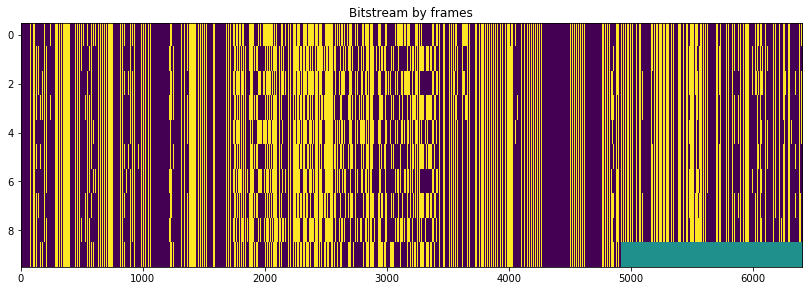

In [47]:
framesize = 6400
plt.figure(figsize = (14,6), facecolor = 'w')
pad = 0
x_pad = np.concatenate((np.zeros(pad), np.sign(x_diff)))
x_pad = np.concatenate((x_pad, np.zeros(framesize - x_pad.size % framesize)))
plt.imshow(x_pad.reshape((-1,framesize)), aspect = 200)
plt.title('Bitstream by frames (differentially decoded)');

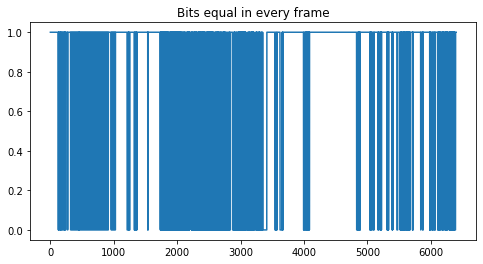

In [48]:
plt.figure(figsize = (8,4), facecolor = 'w')
x_accum = np.sum(x_pad.reshape((-1,framesize)), axis = 0)/np.sum(np.abs(x_pad).reshape((-1,framesize)), axis = 0)
plt.plot(np.abs(x_accum) == 1)
plt.title('Bits equal in every frame (differentially decoded)');

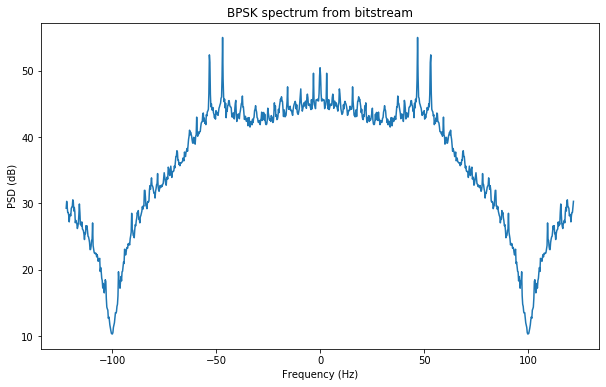

In [49]:
T = 1/100
sps = 10
N = 4096
f_span = 500
y = np.repeat(np.sign(x), 10)
f = np.fft.fftshift(np.average(np.abs(np.fft.fft(y[:y.size//N*N].reshape((-1,N))))**2, axis = 0))
sel = slice(f.size//2 - f_span, f.size//2 + f_span)
plt.figure(figsize = (10,6), facecolor = 'w')
plt.plot(np.fft.fftshift(np.fft.fftfreq(N, T/sps))[sel], 10*np.log10(f[sel]))
plt.title('BPSK spectrum from bitstream')
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD (dB)');